---
title: Generate and Display Rich Outputs
short_title: Generate Rich Outputs
subtitle: Discover the types of cell outputs and metadata that MyST understands
description: MyST allows you to include interactive visualizations directly in your projects using Jupyter Notebooks.
thumbnail: ./thumbnails/interactive-notebooks.png
---

MyST allows you to directly include Jupyter Notebooks in your books, documents and websites. This page of the documentation is actually a Jupyter Notebook that is rendered directly using MyST.

See below for several examples.

## Supported cell outputs

### Interactive visualizations

You can include interactive visualizations that were created by executing code in Jupyter.
For example, let us import `altair` and create a demo of an interactive plot!

In [1]:
import altair as alt
from vega_datasets import data

source = data.cars()
brush = alt.selection_interval(encodings=['x'])
points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    size='Acceleration',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_params(brush)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(brush)

We can now plot the `altair` example, which is fully interactive, try dragging in the plot to select cars by their horsepower.

In [2]:
#| label: img:altair-horsepower
points & bars

alt.VConcatChart(...)

### Static images

Non-interactive images are embedded as PNGs:

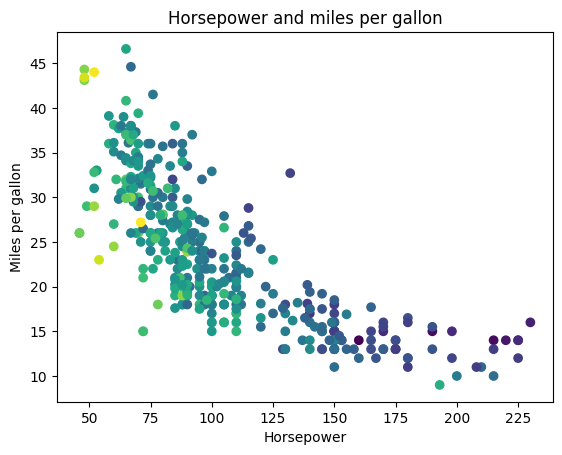

In [3]:
#| label: img:mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter("Horsepower", "Miles_per_Gallon",
           c="Acceleration", data=data.cars())
_ = ax.set(xlabel="Horsepower", ylabel="Miles per gallon",
       title="Horsepower and miles per gallon")

### Tables and DataFrames

This works for non-image outputs as well.
For example, below we'll **output a Table via a Pandas DataFrame**.
We'll show the contents of a dataset loaded above, along with syntax to [label the cell in order to be embedded later](reuse-jupyter-outputs.md).

In [4]:
#| label: tbl:data-cars
# Take a subset of cars so it displays nicely
data.cars().iloc[:5, :5]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
0,chevrolet chevelle malibu,18.0,8,307.0,130.0
1,buick skylark 320,15.0,8,350.0,165.0
2,plymouth satellite,18.0,8,318.0,150.0
3,amc rebel sst,16.0,8,304.0,150.0
4,ford torino,17.0,8,302.0,140.0


### Text outputs

And here we demonstrate a text-based output.

In [5]:
#| label:zen
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


(notebooks:cell-visibility)=

## Control cell visibility

You can control the visibility of cell inputs and outputs by using **cell metadata tags**.
These are special snippets of text that you can attach to a cell in a Jupyter interface like JupyterLab.

The following tags are supported.

Use the **`remove-input`** tag to remove the cell input:

In [2]:
print("A text output with no input!")

A text output with no input!


Use the **`remove-output`** tag to remove the cell output but keep the input:

In [1]:
print("The input of a cell with no output!")

The input of a cell with no output!


Use the **`remove-cell`** tag to entirely remove the entire cell (for example, if it contains sensitive information that you don't want distributed with your MyST document).

In [7]:
# THIS IS ONLY FOR DEVELOPERS
# It shouldn't show up in the documentation at all.
# If it does, it means that there's likely a regression!
#label: removed-cell
print("Removed cell")

Removed cell


## Include notebooks in your MyST site

If you are working with Jupyter `*.ipynb` files, just move your notebooks into the project folder or list them in your table of contents to get them to show up in your website or as a document. `myst` will then include your notebook in parsing, and show the full results as soon as you save your notebook, including any interactive figures.

To customize the title and other frontmatter, ensure the first Jupyter Notebook cell is a markdown cell, and only includes a `YAML` frontmatter block (i.e. surrounded in `---`).

## MyST in Jupyter User Interfaces

If you'd like to write and read MyST Markdown in Jupyter interfaces, check out the [JupyterLab MyST Extension](./quickstart-jupyter-lab-myst.md).
It allows for rich rendering of MyST markdown, frontmatter, and cross-references directly in JupyterLab.